In [35]:
cd /content/drive/MyDrive/day-4Dataset/cnn/

/content/drive/MyDrive/day-4Dataset/cnn


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
ls

Animal_Dataset.zip  dataset/  Flowers-Dataset/     flowers.h5
animals.h5          flowers/  Flowers-Dataset.zip  openCV.ipynb


In [89]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Image Augmentation

In [91]:
train_pre=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [92]:
test_pre=ImageDataGenerator(rescale=1./255)

In [93]:
x_train=train_pre.flow_from_directory(r"/content/drive/MyDrive/day-4Dataset/cnn/Flowers-Dataset/dataset/training",target_size=(64,64),class_mode="categorical",batch_size=25)

Found 3459 images belonging to 5 classes.


In [94]:
x_test=test_pre.flow_from_directory(r"/content/drive/MyDrive/day-4Dataset/cnn/Flowers-Dataset/dataset/testing",target_size=(64,64),class_mode="categorical"
,batch_size=25)

Found 868 images belonging to 5 classes.


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

sequential model building

In [96]:
model=Sequential()

In [97]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [98]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [99]:
model.add(Flatten())

In [100]:
model.add(Dense(300,activation="relu",))

In [101]:
model.add(Dense(300,activation="relu",))

In [146]:
model.add(Dense(5,activation="softmax"))

Compile the model

In [147]:

model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [104]:
len(x_train)

139

Training the model

In [200]:
model.fit(x_train,epochs=20,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/20
139/139 [==============================] - 43s 304ms/step - loss: 1.5979 - accuracy: 0.2454 - val_loss: 1.6008 - val_accuracy: 0.2419
Epoch 2/20
139/139 [==============================] - 40s 290ms/step - loss: 1.5979 - accuracy: 0.2454 - val_loss: 1.6008 - val_accuracy: 0.2419
Epoch 3/20
139/139 [==============================] - 42s 303ms/step - loss: 1.5980 - accuracy: 0.2454 - val_loss: 1.6008 - val_accuracy: 0.2419
Epoch 4/20
139/139 [==============================] - 42s 299ms/step - loss: 1.5980 - accuracy: 0.2454 - val_loss: 1.6007 - val_accuracy: 0.2419
Epoch 5/20
139/139 [==============================] - 40s 286ms/step - loss: 1.5979 - accuracy: 0.2454 - val_loss: 1.6009 - val_accuracy: 0.2419
Epoch 6/20
139/139 [==============================] - 41s 298ms/step - loss: 1.5980 - accuracy: 0.2454 - val_loss: 1.6008 - val_accuracy: 0.2419
Epoch 7/20
139/139 [==============================] - 40s 286ms/step - loss: 1.5978 - accuracy: 0.2454 - val_loss: 1.6008 - val_ac

Save the model

In [201]:
model.save("flowers.h5")

Testing the model

In [203]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [204]:
model=load_model("/content/drive/MyDrive/day-4Dataset/cnn/flowers.h5")

In [215]:
image1=image.load_img("/content/drive/MyDrive/day-4Dataset/cnn/flowers/dandelion/10043234166_e6dd915111_n.jpg",target_size=(64,64))


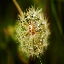

In [216]:
image1

In [207]:
x=image.img_to_array(image1)

In [208]:
x

array([[[133., 163., 197.],
        [134., 165., 196.],
        [134., 165., 196.],
        ...,
        [177., 195., 215.],
        [177., 195., 215.],
        [181., 198., 216.]],

       [[132., 162., 198.],
        [133., 163., 197.],
        [135., 165., 199.],
        ...,
        [178., 196., 218.],
        [177., 195., 215.],
        [181., 198., 216.]],

       [[130., 163., 196.],
        [136., 167., 196.],
        [131., 166., 198.],
        ...,
        [177., 195., 217.],
        [178., 196., 216.],
        [182., 199., 217.]],

       ...,

       [[  0.,   9.,   6.],
        [ 31.,  30.,   2.],
        [ 30.,  43.,  23.],
        ...,
        [ 28.,  42.,   6.],
        [ 93., 107.,  81.],
        [ 21.,  31.,   6.]],

       [[  0.,  10.,   2.],
        [ 29.,  35.,   1.],
        [ 67.,  89.,  51.],
        ...,
        [  3.,  10.,   2.],
        [  3.,   9.,   5.],
        [ 30.,  43.,   0.]],

       [[  0.,   8.,   3.],
        [ 23.,  32.,   1.],
        [ 36.,  

In [209]:
x.ndim

3

In [210]:
x=np.expand_dims(x,axis=0)

In [211]:
pred=model.predict(x)

In [212]:
pred

array([[0.17659025, 0.24631065, 0.18186605, 0.16793153, 0.2273016 ]],
      dtype=float32)

In [213]:
labels=["daisy","dandelion","rose","sunflower","tulip"]

Output

In [217]:
labels[np.argmax(pred)]

'dandelion'